## Problem Statement

## Health Insurance Lead Prediction

Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

Now the company needs your help in building a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

Demographics (city, age, region etc.)
Information regarding holding policies of the customer
Recommended Policy Information


## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Feature Engineering__

* __Step 6: Building Model__
    
* __How to Make a Submission?__
* __Guidelines for Final Submission__

### Step 1: Importing the Relevant Libraries

In [1]:
# Import Required Python Packages :

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# From Logistic to XGB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Setting SEED to Reproduce Same Results even with "GPU"
seed_value = 1994
import os
os.environ['PYTHONHASHSEED'] = str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
SEED=seed_value

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import plotly.express as px

### Step 2: Data Inspection

In [3]:
train = pd.read_csv("train_Df64byy.csv")
test = pd.read_csv("test_YCcRUnU.csv")

In [4]:
train.shape,test.shape

((50882, 14), (21805, 13))

* __We have 50882 rows and 14 columns in Train set whereas Test set has 21805 rows and 13 columns.__

In [5]:
train['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

__We have to keep in mind that the training dataset is imbalanced__

In [6]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [7]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [9]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [10]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

* __We have 23%,40% and 40% of missing values in Health Indicator,Holding_Policy_Duration and Holding_Policy_Type columns respectively.__

In [11]:
#rename the attribute
train.rename(columns = {'Health Indicator':'Health_Indicator'}, inplace = True)
test.rename(columns = {'Health Indicator':'Health_Indicator'}, inplace = True)

In [12]:
# Check train data for Values of each Column - Short Form
for col in list(train):
    print(col)
    print(train[col].unique())

ID
[    1     2     3 ... 50880 50881 50882]
City_Code
['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']
Region_Code
[3213 1117 3732 ... 5326 6149 5450]
Accomodation_Type
['Rented' 'Owned']
Reco_Insurance_Type
['Individual' 'Joint']
Upper_Age
[36 75 32 52 44 28 59 21 66 20 27 34 43 55 23 18 22 25 24 40 26 56 35 63
 49 64 67 42 71 57 73 31 19 48 65 54 33 30 69 68 37 29 62 58 38 39 60 41
 45 51 46 70 61 74 53 72 50 47]
Lower_Age
[36 22 32 48 44 52 28 73 43 26 21 47 66 20 27 34 55 23 18 25 24 56 35 63
 64 67 75 42 71 68 31 19 65 54 33 74 30 69 29 62 58 39 60 57 41 40 45 37
 51 59 49 38 46 70 61 53 16 72 50 17]
Is_Spouse
['No' 'Yes']
Health_Indicator
['X1' 'X2' nan 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
Holding_Policy_Duration
['14+' nan '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0']
Holding

In [13]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 6
Numerical Features in Train Set: 8


In [14]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 6
Numerical Features in Test Set: 7


### Step 3: Data Cleaning

__1. Fill/Impute Missing Values Continuous - Mean/Median/Any Specific Value & Categorical - Others/ForwardFill/BackFill :
Missing data in the training data set can lead to wrong prediction.__

In [15]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health_Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [16]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health_Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

* Health Indicator,Holding_Policy_Duration and Holding_Policy_Type have some missing values in the data
* We can impute the missing values by "Mode" from the column since all the 3 attributes that have missing values are Categorical attributes

In [17]:
#Imputing Health_Indicator with Mode
train['Health_Indicator']= train['Health_Indicator'].fillna(train['Health_Indicator'].mode()[0])
test['Health_Indicator']= test['Health_Indicator'].fillna(test['Health_Indicator'].mode()[0])

In [18]:
#Imputing with Zero's

train['Holding_Policy_Duration']=train['Holding_Policy_Duration'].fillna(0)
test['Holding_Policy_Duration']=test['Holding_Policy_Duration'].fillna(0)

In [19]:
#Imputing with Zero's
#train['Holding_Policy_Type']= train['Holding_Policy_Type'].fillna(train['Holding_Policy_Type'].mode()[0])
#test['Holding_Policy_Type']= test['Holding_Policy_Type'].fillna(test['Holding_Policy_Type'].mode()[0])
train['Holding_Policy_Type']= train['Holding_Policy_Type'].fillna(0)
test['Holding_Policy_Type']= test['Holding_Policy_Type'].fillna(0)

* __Checking if there are any missing values__

In [20]:
train['Health_Indicator'].isnull().sum(),test['Health_Indicator'].isnull().sum()

(0, 0)

In [21]:
train['Holding_Policy_Duration'].isnull().sum(),test['Holding_Policy_Duration'].isnull().sum()

(0, 0)

In [22]:
train['Holding_Policy_Type'].isnull().sum(),test['Holding_Policy_Type'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from the columns Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type

### Step 4: Exploratory Data Analysis

__Lets Plot Upper_Age and Lower_Age Box Plot__

<Figure size 576x360 with 0 Axes>

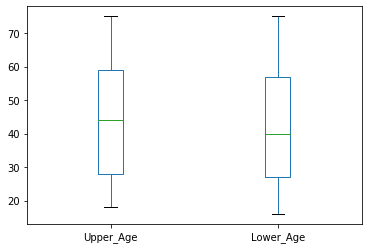

In [23]:
plt.figure(figsize=(8,5))

train[['Upper_Age','Lower_Age']].plot(kind='box') 

__The Box Plots above clearly show no "Outliers" in Upper_Age and Lower_Age attributes__

__Lets Plot Reco_Policy_Premium Box Plot to check if there are any Outliers__

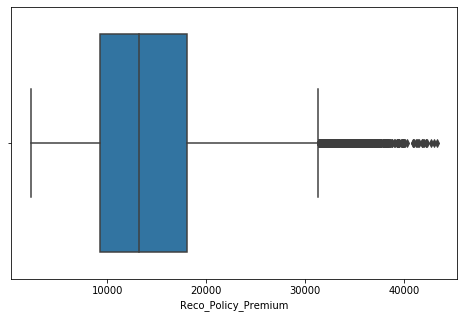

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot('Reco_Policy_Premium',data=train)

__The Box Plots above clearly show there are "Outliers" in Reco_Policy_Premium__

In [25]:
train_ot=train['Reco_Policy_Premium']
Q1 = train['Reco_Policy_Premium'].quantile(0.25)
Q3 = train['Reco_Policy_Premium'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

train_ot[(train['Reco_Policy_Premium'] <= Q1 - 2.5 * IQR) | (train['Reco_Policy_Premium'] >=Q3 + 2.5 *IQR)]  #for multiples of iqr

1393     41850.0
1905     42316.8
5826     42240.0
7080     43350.4
7975     42256.0
10015    41289.6
11885    41932.8
13107    41529.6
14908    42066.0
15038    40325.6
16380    41040.0
18281    41833.6
29127    41496.0
31280    41299.2
33802    40983.0
44606    42739.2
46547    43046.4
50470    40918.4
Name: Reco_Policy_Premium, dtype: float64

* Since the Outliers in Reco_Policy_Premium attribute are just 18 we can leave them as such since these are not too many

* ___Checking the Co-Relation Co-Efficients between the variables___

In [26]:
cor_data = train.corr()
corr_pairs = cor_data.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)
print("===========================================================================")
print("===============Printing Positively Correlated Pairs========================")
print("===========================================================================")
pos_corr_pairs = sorted_pairs[(abs(sorted_pairs) >= 0.5) & (abs(sorted_pairs) < 1)]
print(pos_corr_pairs)

Reco_Policy_Cat      Region_Code           -0.065120
Region_Code          Reco_Policy_Cat       -0.065120
Reco_Policy_Premium  Region_Code           -0.010797
Region_Code          Reco_Policy_Premium   -0.010797
Lower_Age            Region_Code           -0.005928
                                              ...   
                     Lower_Age              1.000000
Upper_Age            Upper_Age              1.000000
Region_Code          Region_Code            1.000000
Reco_Policy_Premium  Reco_Policy_Premium    1.000000
Response             Response               1.000000
Length: 64, dtype: float64
===============Printing Positively Correlated Pairs========================
Lower_Age            Reco_Policy_Premium    0.615739
Reco_Policy_Premium  Lower_Age              0.615739
Upper_Age            Reco_Policy_Premium    0.792689
Reco_Policy_Premium  Upper_Age              0.792689
Lower_Age            Upper_Age              0.921392
Upper_Age            Lower_Age              0.921

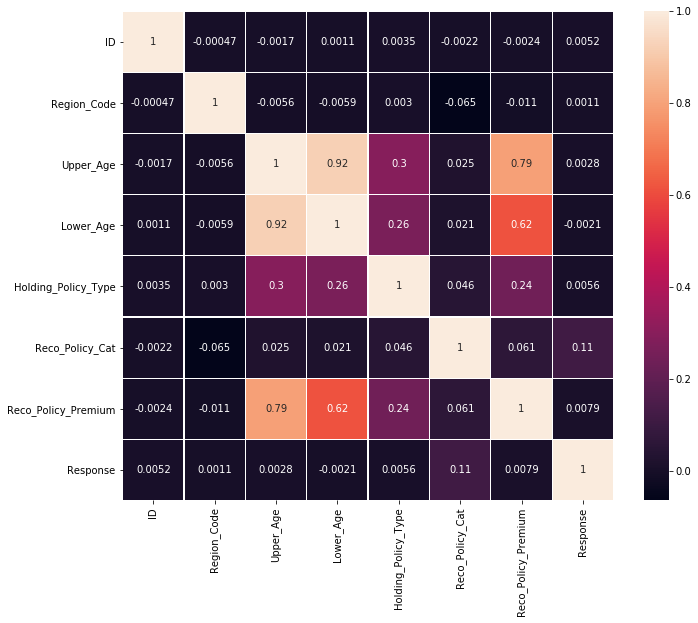

In [27]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(train.corr(), annot = True,linewidths=.2)

* __From the above HeatMap we can infer that Response is positively Co-Related with Reco_Policy_Cat and Reco_Policy_Premium__
* __Upper_Age and Lower_Age are very hghly positively Co-Related Variables__
* __Upper_Age and Lower_Age are very hghly positively Co-Related with Reco_Policy_Premium__

In [28]:
train['age_diff'] = train['Upper_Age'] - train['Lower_Age']

In [29]:
test['age_diff'] = test['Upper_Age'] - test['Lower_Age']

In [30]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health_Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response', 'age_diff'],
      dtype='object')

In [31]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,age_diff
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0,0,53
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0,4
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,0


In [32]:
cor_data = train.corr()
corr_pairs = cor_data.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
pos_corr_pairs = sorted_pairs[(abs(sorted_pairs) >= 0.5) & (abs(sorted_pairs) < 1)]
print(pos_corr_pairs)

Lower_Age            Reco_Policy_Premium    0.615739
Reco_Policy_Premium  Lower_Age              0.615739
                     Upper_Age              0.792689
Upper_Age            Reco_Policy_Premium    0.792689
                     Lower_Age              0.921392
Lower_Age            Upper_Age              0.921392
dtype: float64


* ____As IS-Spouse is not at all Co-Related with Response we will be dropping it____

In [33]:
train = train.drop(['Is_Spouse'],axis=1)

In [34]:
train.head(5)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,age_diff
0,1,C3,3213,Rented,Individual,36,36,X1,14+,3.0,22,11628.0,0,0
1,2,C5,1117,Owned,Joint,75,22,X2,0,0.0,22,30510.0,0,53
2,3,C5,3732,Owned,Individual,32,32,X1,1.0,1.0,19,7450.0,1,0
3,4,C24,4378,Owned,Joint,52,48,X1,14+,3.0,19,17780.0,0,4
4,5,C8,2190,Rented,Individual,44,44,X2,3.0,1.0,16,10404.0,0,0


In [35]:
test = test.drop(['Is_Spouse'],axis=1)

In [36]:
test.head(1)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,age_diff
0,50883,C1,156,Owned,Individual,30,30,X1,6.0,3.0,5,11934.0,0


* Checking for Unique Values in attributes

In [37]:
train['Accomodation_Type'].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

In [38]:
train['Reco_Insurance_Type'].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

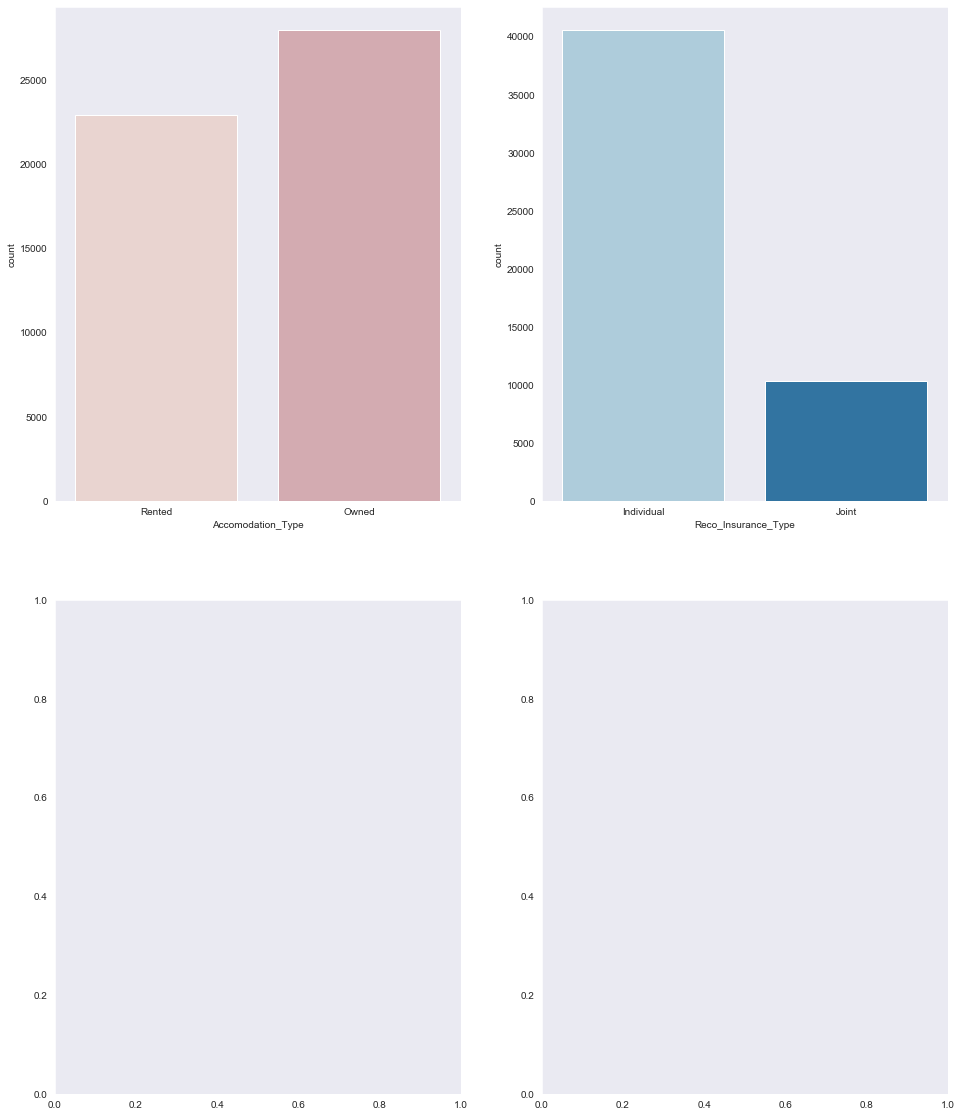

In [39]:
sns.set_style('dark') 
fig, ax = plt.subplots(2,2,figsize=(16,20)) 
sns.countplot('Accomodation_Type',data=train,ax=ax[0][0], palette=sns.cubehelix_palette())
sns.countplot('Reco_Insurance_Type',data=train,ax=ax[0][1], palette=sns.color_palette('Paired'))

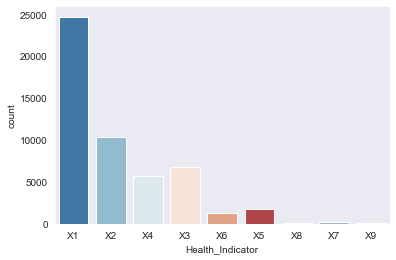

In [40]:
sns.countplot('Health_Indicator',data=train, palette=sns.color_palette('RdBu_r'))

__We can Infer the below from the above graphs__
* Accomodation_Type has customers equally distributed between Onwed and Rented categories
* Majority of the customers Recommended Insurance type is Individual and there are less number of customers with Joint Insurance Type
* Almost 90% of the customers are single
* Health Indicator wise majority of the customers fall under the categories X1,X2

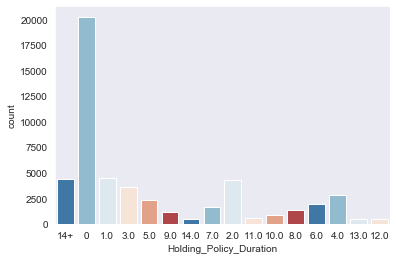

In [41]:
sns.set_style('dark') 
#fig, ax = plt.subplots(figsize=(16,20)) 
sns.countplot('Holding_Policy_Duration',data=train, palette=sns.color_palette('RdBu_r'))

__As per the above graph__
* We can conclude that 50% of the customers have subscirbed with Policy Duration as 1 followed by customers who have subscribed with policy duration of 2/4/14+.

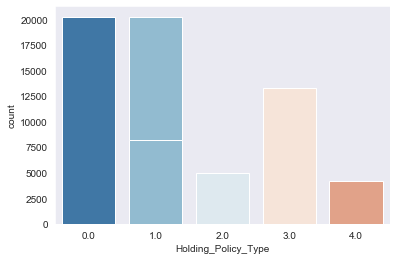

In [42]:
sns.set_style('dark') 
#fig, ax = plt.subplots(figsize=(16,20)) 
sns.countplot('Holding_Policy_Duration',data=train, palette=sns.color_palette('RdBu_r'))
sns.countplot('Holding_Policy_Type',data=train, palette=sns.color_palette('RdBu_r'))
#sns.countplot('Reco_Policy_Cat',data=train,ax=ax[1][0], palette=sns.color_palette('RdBu_r'))
#sns.countplot('City_Code',data=train,ax=ax[1][1], palette=sns.color_palette('RdBu_r'))

__As per the above graph__
* We can conclude that Policy Type 3 and Policy Type 2 have majority of the customers.

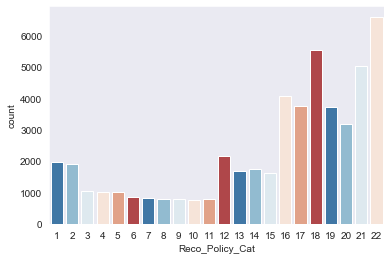

In [43]:
sns.set_style('dark') 
sns.countplot('Reco_Policy_Cat',data=train, palette=sns.color_palette('RdBu_r'))

__As per the above graph__
* We can conclude that Recommended Policy Category of 22/18/21 has majority of the customers

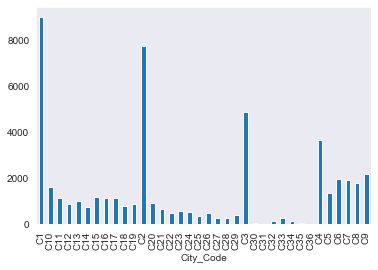

In [44]:
sns.set_style('dark') 
figsize=(20,20)
#sns.countplot('City_Code',data=train, palette=sns.color_palette('RdBu_r'))
train.groupby('City_Code').size().plot(kind='bar')

__As per the above graph we can infer that__
* Majoirty of the Customers are from City Code C1,C2,C3,C4

### Step 5 : Feature Engineering

### Lets first select the required attributes for the Model 

In [45]:
train['Reco_Insurance_Type']=train['Reco_Insurance_Type'].replace({'Joint':0,'Individual':1})

In [46]:
test['Reco_Insurance_Type']=test['Reco_Insurance_Type'].replace({'Joint':0,'Individual':1})

In [47]:
train['Accomodation_Type']=train['Accomodation_Type'].replace({'Owned':0,'Rented':1})

In [48]:
test['Accomodation_Type']=test['Accomodation_Type'].replace({'Owned':0,'Rented':1})

In [49]:
train['Health_Indicator']=train['Health_Indicator'].replace({'X1':1,'X2':2,'X3':3,'X4':4,'X5':5,'X6':6,
                                                            'X7':7,'X8':8,'X9':9})

In [50]:
test['Health_Indicator']=test['Health_Indicator'].replace({'X1':1,'X2':2,'X3':3,'X4':4,'X5':5,'X6':6,
                                                            'X7':7,'X8':8,'X9':9})

In [51]:
# Combine train and test data into single DataFrame - complete_data
complete_data = pd.concat([train,test],axis=0)

In [52]:
complete_data['Holding_Policy_Duration']=complete_data['Holding_Policy_Duration'].replace({'14+':'15'})

In [53]:
##complete_data['Is_Spouse']=complete_data['Is_Spouse'].replace({'No':1,'Yes':0})

In [54]:
complete_data['City_Code']=complete_data['City_Code'].replace({'C1':1,'C10':10,'C11':11,'C12':12,'C13':13,'C14':14,
                                                               'C15':15,'C16':16,'C17':17,'C18':18,'C19':19,
                                                               'C2':2,'C20':20,'C21':21,'C22':22,'C23':23,'C24':24,
                                                               'C25':25,'C26':26,'C27':27,'C28':28,'C29':29,
                                                               'C3':3,'C30':30,'C31':31,'C32':32,'C33':33,'C34':34,
                                                               'C35':35,'C36':36,'C4':4,'C5':5,'C6':6,'C7':7,'C8':8,'C9':9})

In [55]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       72687 non-null  int64  
 1   City_Code                72687 non-null  int64  
 2   Region_Code              72687 non-null  int64  
 3   Accomodation_Type        72687 non-null  int64  
 4   Reco_Insurance_Type      72687 non-null  int64  
 5   Upper_Age                72687 non-null  int64  
 6   Lower_Age                72687 non-null  int64  
 7   Health_Indicator         72687 non-null  int64  
 8   Holding_Policy_Duration  72687 non-null  object 
 9   Holding_Policy_Type      72687 non-null  float64
 10  Reco_Policy_Cat          72687 non-null  int64  
 11  Reco_Policy_Premium      72687 non-null  float64
 12  Response                 50882 non-null  float64
 13  age_diff                 72687 non-null  int64  
dtypes: float64(3), int64(1

* ___Grouping Variables and Summing them up to create new Attributes___

In [56]:
#complete_data['healthInd_rCode_lAge'] = complete_data.groupby(['Region_Code','Lower_Age'],
#                                                                     axis=0)['Health_Indicator'].transform('sum')

In [57]:
#complete_data['healthInd_cityCode_uAge'] = complete_data.groupby(['City_Code','age_diff'],
#                                                                     axis=0)['Health_Indicator'].transform('sum')

In [58]:
#complete_data['healthInd_cityCode_lAge'] = complete_data.groupby(['City_Code','Lower_Age'],
#                                                                     axis=0)['Health_Indicator'].transform('sum')

In [59]:
complete_data['healthInd_rCode_polCat'] = complete_data.groupby(['Region_Code','Reco_Policy_Cat'],
                                                               axis=0)['Health_Indicator'].transform('sum')

In [60]:
complete_data['healthInd_cityCode_polCat'] = complete_data.groupby(['City_Code','Reco_Policy_Cat'],
                                                               axis=0)['Health_Indicator'].transform('sum')

In [61]:
complete_data['recPolCat_rCode_cCode_healthInd'] = complete_data.groupby(['Region_Code','City_Code','Health_Indicator'],
                                                               axis=0)['Reco_Policy_Cat'].transform('sum')

In [62]:
#complete_data['healthInd_rCode_cCode__recPolCat'] = complete_data.groupby(['Region_Code','City_Code','Reco_Policy_Cat'],
#                                                               axis=0)['Health_Indicator'].transform('sum')

In [63]:
complete_data['healthInd_rCode_polDuration'] = complete_data.groupby(['Region_Code','Holding_Policy_Duration'],
                                                               axis=0)['Health_Indicator'].transform('sum')

In [64]:
complete_data['healthInd_cityCode_polDuration'] = complete_data.groupby(['City_Code','Holding_Policy_Duration'],
                                                               axis=0)['Health_Indicator'].transform('sum')

In [65]:
complete_data['healthInd_rCode_holdingpolType'] = complete_data.groupby(['Region_Code','Holding_Policy_Type'],
                                                               axis=0)['Health_Indicator'].transform('sum')

In [66]:
complete_data['healthInd_cityCode_holdingpolType'] = complete_data.groupby(['City_Code','Holding_Policy_Type'],
                                                               axis=0)['Health_Indicator'].transform('sum')

In [67]:
complete_data['healthInd_rCode'] = complete_data.groupby(['Region_Code'],
                                                               axis=0)['Health_Indicator'].transform('sum')

In [68]:
complete_data['healthInd_cityCode'] = complete_data.groupby(['City_Code'],
                                                               axis=0)['Health_Indicator'].transform('sum')

In [69]:
complete_data['diffAge_recoInsType_recoPolicyCat'] = complete_data.groupby(['Reco_Insurance_Type','Reco_Policy_Cat',
                                                                            'age_diff'],
                                                                           axis=0)['Health_Indicator'].transform('sum')

In [70]:
complete_data['healthInd_holdPolDur_holdingpolType'] = complete_data.groupby(['Holding_Policy_Duration','Holding_Policy_Type'],
                                                               axis=0)['Health_Indicator'].transform('sum')

In [71]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   72687 non-null  int64  
 1   City_Code                            72687 non-null  int64  
 2   Region_Code                          72687 non-null  int64  
 3   Accomodation_Type                    72687 non-null  int64  
 4   Reco_Insurance_Type                  72687 non-null  int64  
 5   Upper_Age                            72687 non-null  int64  
 6   Lower_Age                            72687 non-null  int64  
 7   Health_Indicator                     72687 non-null  int64  
 8   Holding_Policy_Duration              72687 non-null  object 
 9   Holding_Policy_Type                  72687 non-null  float64
 10  Reco_Policy_Cat                      72687 non-null  int64  
 11  Reco_Policy_Premium         

In [72]:
complete_data.head(-5)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,...,healthInd_cityCode_polCat,recPolCat_rCode_cCode_healthInd,healthInd_rCode_polDuration,healthInd_cityCode_polDuration,healthInd_rCode_holdingpolType,healthInd_cityCode_holdingpolType,healthInd_rCode,healthInd_cityCode,diffAge_recoInsType_recoPolicyCat,healthInd_holdPolDur_holdingpolType
0,1,3,3213,1,1,36,36,1,15,3.0,...,1131,117,3,1223,1,3854,15,14373,15593,6877
1,2,5,1117,0,0,75,22,2,0,0.0,...,214,66,18,1608,18,1608,45,4075,4,60121
2,3,5,3732,0,1,32,32,1,1.0,1.0,...,238,24,2,454,6,782,11,4075,8545,5081
3,4,24,4378,0,0,52,48,1,15,3.0,...,177,36,4,152,3,319,9,1864,217,6877
4,5,8,2190,1,1,44,44,2,3.0,1.0,...,484,56,3,393,5,741,20,5606,9483,3198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21795,72678,6,2990,0,1,53,53,1,3.0,1.0,...,788,102,1,413,3,791,23,5661,7362,3198
21796,72679,12,84,0,1,41,41,3,3.0,2.0,...,227,72,8,210,16,369,110,2630,15593,1895
21797,72680,22,2108,0,1,59,59,2,11.0,4.0,...,101,45,2,11,6,139,26,1409,15593,291
21798,72681,1,340,0,1,24,24,1,0,0.0,...,3875,358,24,9703,24,9703,73,27336,8545,60121


### ___Frequency Encoding was tried on few attributes and finally concluded that when its applied on City_Code,Reco_Policy_Cat and Reco_Policy_Premium , they were adding value to the model in predicting the target Variable___

In [73]:
#complete_data.loc[(complete_data['age_diff'] >= 1) & (complete_data['age_diff'] <= 30), 'Cust_Age_Cat'] = 3 
#complete_data.loc[(complete_data['age_diff'] >= 31) & (complete_data['age_diff'] <= 70), 'Cust_Age_Cat'] = 4
frequency_encoding = complete_data.groupby(["City_Code"]).size()/len(complete_data)
complete_data["City_Code_f"]   = complete_data["City_Code"].map(frequency_encoding)

In [74]:
#complete_data.loc[(complete_data['age_diff'] >= 1) & (complete_data['age_diff'] <= 30), 'Cust_Age_Cat'] = 3 
#complete_data.loc[(complete_data['age_diff'] >= 31) & (complete_data['age_diff'] <= 70), 'Cust_Age_Cat'] = 4
frequency_encoding = complete_data.groupby(["Reco_Policy_Cat"]).size()/len(complete_data)
complete_data["Reco_Policy_Cat_f"]   = complete_data["Reco_Policy_Cat"].map(frequency_encoding)

In [75]:
frequency_encoding = complete_data.groupby(["Reco_Policy_Premium"]).size()/len(complete_data)
complete_data["Reco_Policy_Premium_f"]   = complete_data["Reco_Policy_Premium"].map(frequency_encoding)

In [76]:
# Getting back Train and Test after Preprocessing :
train=complete_data[complete_data['Response'].isnull()==False]
test=complete_data[complete_data['Response'].isnull()==True].drop(['Response'],axis=1)
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Health_Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response', 'age_diff', 'healthInd_rCode_polCat',
       'healthInd_cityCode_polCat', 'recPolCat_rCode_cCode_healthInd',
       'healthInd_rCode_polDuration', 'healthInd_cityCode_polDuration',
       'healthInd_rCode_holdingpolType', 'healthInd_cityCode_holdingpolType',
       'healthInd_rCode', 'healthInd_cityCode',
       'diffAge_recoInsType_recoPolicyCat',
       'healthInd_holdPolDur_holdingpolType', 'City_Code_f',
       'Reco_Policy_Cat_f', 'Reco_Policy_Premium_f'],
      dtype='object')

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21805 entries, 0 to 21804
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   21805 non-null  int64  
 1   City_Code                            21805 non-null  int64  
 2   Region_Code                          21805 non-null  int64  
 3   Accomodation_Type                    21805 non-null  int64  
 4   Reco_Insurance_Type                  21805 non-null  int64  
 5   Upper_Age                            21805 non-null  int64  
 6   Lower_Age                            21805 non-null  int64  
 7   Health_Indicator                     21805 non-null  int64  
 8   Holding_Policy_Duration              21805 non-null  object 
 9   Holding_Policy_Type                  21805 non-null  float64
 10  Reco_Policy_Cat                      21805 non-null  int64  
 11  Reco_Policy_Premium         

In [78]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Health_Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response', 'age_diff', 'healthInd_rCode_polCat',
       'healthInd_cityCode_polCat', 'recPolCat_rCode_cCode_healthInd',
       'healthInd_rCode_polDuration', 'healthInd_cityCode_polDuration',
       'healthInd_rCode_holdingpolType', 'healthInd_cityCode_holdingpolType',
       'healthInd_rCode', 'healthInd_cityCode',
       'diffAge_recoInsType_recoPolicyCat',
       'healthInd_holdPolDur_holdingpolType', 'City_Code_f',
       'Reco_Policy_Cat_f', 'Reco_Policy_Premium_f'],
      dtype='object')

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50882 entries, 0 to 50881
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   50882 non-null  int64  
 1   City_Code                            50882 non-null  int64  
 2   Region_Code                          50882 non-null  int64  
 3   Accomodation_Type                    50882 non-null  int64  
 4   Reco_Insurance_Type                  50882 non-null  int64  
 5   Upper_Age                            50882 non-null  int64  
 6   Lower_Age                            50882 non-null  int64  
 7   Health_Indicator                     50882 non-null  int64  
 8   Holding_Policy_Duration              50882 non-null  object 
 9   Holding_Policy_Type                  50882 non-null  float64
 10  Reco_Policy_Cat                      50882 non-null  int64  
 11  Reco_Policy_Premium         

In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21805 entries, 0 to 21804
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   21805 non-null  int64  
 1   City_Code                            21805 non-null  int64  
 2   Region_Code                          21805 non-null  int64  
 3   Accomodation_Type                    21805 non-null  int64  
 4   Reco_Insurance_Type                  21805 non-null  int64  
 5   Upper_Age                            21805 non-null  int64  
 6   Lower_Age                            21805 non-null  int64  
 7   Health_Indicator                     21805 non-null  int64  
 8   Holding_Policy_Duration              21805 non-null  object 
 9   Holding_Policy_Type                  21805 non-null  float64
 10  Reco_Policy_Cat                      21805 non-null  int64  
 11  Reco_Policy_Premium         

### ___Target Encoding was tried on few attributes and finally concluded that Reco_Policy_Cat was adding value to the model in predicting the target Variable___

In [81]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

tr_g, te_g = target_encode(train["Reco_Policy_Cat"], 
                         test["Reco_Policy_Cat"],
                         target=train["Response"], 
                         min_samples_leaf=200,
                         smoothing=20,
                         noise_level=0.02)

train['Reco_Policy_Cat_tarEn']=tr_g
test['Reco_Policy_Cat_tarEn']=te_g

In [82]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Health_Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response', 'age_diff', 'healthInd_rCode_polCat',
       'healthInd_cityCode_polCat', 'recPolCat_rCode_cCode_healthInd',
       'healthInd_rCode_polDuration', 'healthInd_cityCode_polDuration',
       'healthInd_rCode_holdingpolType', 'healthInd_cityCode_holdingpolType',
       'healthInd_rCode', 'healthInd_cityCode',
       'diffAge_recoInsType_recoPolicyCat',
       'healthInd_holdPolDur_holdingpolType', 'City_Code_f',
       'Reco_Policy_Cat_f', 'Reco_Policy_Premium_f', 'Reco_Policy_Cat_tarEn'],
      dtype='object')

In [83]:
test.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Health_Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'age_diff', 'healthInd_rCode_polCat',
       'healthInd_cityCode_polCat', 'recPolCat_rCode_cCode_healthInd',
       'healthInd_rCode_polDuration', 'healthInd_cityCode_polDuration',
       'healthInd_rCode_holdingpolType', 'healthInd_cityCode_holdingpolType',
       'healthInd_rCode', 'healthInd_cityCode',
       'diffAge_recoInsType_recoPolicyCat',
       'healthInd_holdPolDur_holdingpolType', 'City_Code_f',
       'Reco_Policy_Cat_f', 'Reco_Policy_Premium_f', 'Reco_Policy_Cat_tarEn'],
      dtype='object')

### Step 6: Building Model

### __We will create XGB Model with K-Folds Cross Validation to predict the Target variable__

In [84]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()

train['Holding_Policy_Duration'] = lbl.fit_transform(train['Holding_Policy_Duration'].astype(str))
test['Holding_Policy_Duration'] = lbl.fit_transform(test['Holding_Policy_Duration'].astype(str))


In [85]:
# Create x and Y
y = train["Response"]
# Dropping ID and Lower_Age from Train DataSet
X = train.drop(["Response","ID","Lower_Age"], axis=1)

In [86]:
# Dropping ID and Lower_Age from Test DataSet
test = test.drop(["ID","Lower_Age"],axis=1)

In [87]:
sub = pd.read_csv('sample_submission_QrCyCoT.csv')

In [88]:
from sklearn.model_selection import StratifiedKFold, KFold
# XGBOOST Model
kf=KFold(n_splits=10,shuffle=True)
preds_3   = list()
y_pred_3  = []
rocauc_score = []
for i,(train_idx,val_idx) in enumerate(kf.split(X)):
    X_train, y_train = X.iloc[train_idx,:], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx, :], y.iloc[val_idx]
    print('\nFold: {}\n'.format(i+1))
    xg=XGBClassifier( eval_metric='auc',
                     # GPU PARAMETERS #
                     tree_method='hist',
                     ###gpu_id=0,
                     # GPU PARAMETERS #
                     random_state=294,
                     learning_rate=0.15,
                     max_depth=7,
                     n_estimators=494,
                     objective='binary:logistic')
    xg.fit(X_train, y_train
           ,eval_set=[(X_train, y_train),(X_val, y_val)]
           ,early_stopping_rounds=100
           ,verbose=100)

    
    roc_auc = roc_auc_score(y_val,xg.predict_proba(X_val)[:, 1])
    rocauc_score.append(roc_auc)
    preds_3.append(xg.predict_proba(test [test.columns])[:, 1])
print('\nFold: {}\n'.format(i+1))
y_pred_final_3         = np.mean(preds_3,axis=0)
sub['Response']=y_pred_final_3


Fold: 1

[0]	validation_0-auc:0.79660	validation_1-auc:0.78299
[100]	validation_0-auc:0.90364	validation_1-auc:0.80084
[132]	validation_0-auc:0.92228	validation_1-auc:0.79981

Fold: 2

[0]	validation_0-auc:0.79433	validation_1-auc:0.78610
[100]	validation_0-auc:0.90805	validation_1-auc:0.81090
[170]	validation_0-auc:0.94362	validation_1-auc:0.80847

Fold: 3

[0]	validation_0-auc:0.79575	validation_1-auc:0.77453
[100]	validation_0-auc:0.90448	validation_1-auc:0.79889
[181]	validation_0-auc:0.94402	validation_1-auc:0.79554

Fold: 4

[0]	validation_0-auc:0.79515	validation_1-auc:0.77904
[100]	validation_0-auc:0.90646	validation_1-auc:0.80136
[182]	validation_0-auc:0.94996	validation_1-auc:0.79883

Fold: 5

[0]	validation_0-auc:0.79520	validation_1-auc:0.76958
[100]	validation_0-auc:0.90849	validation_1-auc:0.79806
[152]	validation_0-auc:0.93561	validation_1-auc:0.79563

Fold: 6

[0]	validation_0-auc:0.79519	validation_1-auc:0.78204
[100]	validation_0-auc:0.90632	validation_1-auc:0.79470


In [89]:
#classifier = RandomForestClassifier(random_state=0)
feature_imp = pd.Series(xg.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

healthInd_rCode_polCat                 0.206472
Reco_Policy_Cat                        0.084587
healthInd_rCode                        0.068526
Reco_Policy_Cat_tarEn                  0.046530
Reco_Policy_Cat_f                      0.040056
City_Code_f                            0.034550
healthInd_cityCode_polCat              0.033248
Region_Code                            0.032145
City_Code                              0.031025
healthInd_rCode_holdingpolType         0.028384
diffAge_recoInsType_recoPolicyCat      0.028074
healthInd_cityCode_holdingpolType      0.027154
healthInd_cityCode                     0.026763
healthInd_cityCode_polDuration         0.026352
Reco_Policy_Premium_f                  0.026183
recPolCat_rCode_cCode_healthInd        0.026025
healthInd_holdPolDur_holdingpolType    0.025881
Holding_Policy_Type                    0.025374
Reco_Policy_Premium                    0.025221
Health_Indicator                       0.024889
healthInd_rCode_polDuration            0

In [90]:
submission = pd.read_csv('sample_submission_QrCyCoT.csv')

submission['Response'] = y_pred_final_3

submission.to_csv('my_submission_XGB_tarFreqEnc_Final.csv', index=False)

In [91]:
print('ROC_AUC - CV Score: {}'.format((sum(rocauc_score)/10)),'\n')
print("Score : ",rocauc_score)

ROC_AUC - CV Score: 0.8015970883848988 

Score :  [0.8049028841657392, 0.8136976341432911, 0.799479895098542, 0.8026515176844422, 0.7998961800604023, 0.7972739807805079, 0.8057306647379219, 0.7832152959017089, 0.8019749057204492, 0.8071479255559841]


### XGB Model is giving better result with an ROC_AUC_SCORE of 0.8015970883848988 
#### This Model is by far much better than the AUC scores of the models that were generated prior to this using Logistic Regression,Decision Tree and XGB(All using gridsearch to find the Best Parameters)

In [92]:
#final_predictions

## How to Make a Submission?

In [93]:
##from IPython.display import HTML

##HTML('<iframe width="700" height="380" src="https://www.youtube.com/embed/zevnI9TgTtA" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')    
